# Importing necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
#plotting the best parameters
import matplotlib.patches as mpatches


from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.metrics import roc_curve
import numpy as np

# Reading the collected dataset

In [2]:
path = '/Ml files/suicide ideation/Suicide Ideation Detection using natural Language Processing'


In [3]:
df = pd.read_csv(path + '/dataset/suicidewatch_cleaned_df.csv')

# Suffling the dataset

In [4]:
df =  shuffle(df).reset_index(drop=True)
df.head()

,text,label,cleaned_text
0,So I asked my crush out I got laughed at and f...,0,ask crush get laugh friendzoned
1,I've finally started planning it. I dealt with...,1,finally start plan dealt extreme child neglect...
2,i bought a skirt and a crop top. help it cost ...,0,buy skirt crop top help cost kr buy two one on...
3,good morning sexies just woke up so good morning,0,good morning sexies wake good morning
4,"Since looks matter, I have to change myself mo...",0,since look matter change already sometimes isn...


# Tokenizing the cleaned text

In [5]:
#removing shortwords
df.cleaned_text=df['cleaned_text'].astype(str)
tokenized_df=df['cleaned_text'].apply(lambda x: x.split())
tokenized_df.head(5)

0                [ask, crush, get, laugh, friendzoned]
1    [finally, start, plan, dealt, extreme, child, ...
2    [buy, skirt, crop, top, help, cost, kr, buy, t...
3         [good, morning, sexies, wake, good, morning]
4    [since, look, matter, change, already, sometim...
Name: cleaned_text, dtype: object

In [6]:
df['cleaned_text']=df['cleaned_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head(5)

,text,label,cleaned_text
0,So I asked my crush out I got laughed at and f...,0,crush laugh friendzoned
1,I've finally started planning it. I dealt with...,1,finally start plan dealt extreme child neglect...
2,i bought a skirt and a crop top. help it cost ...,0,skirt crop help cost friend dont know gonna we...
3,good morning sexies just woke up so good morning,0,good morning sexies wake good morning
4,"Since looks matter, I have to change myself mo...",0,since look matter change already sometimes isn...


# Feature extraction with Count Vectorizer

In [7]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(),lowercase=False,max_features=15000, min_df=5,ngram_range=(1,1))
text_counts = tfidf.fit_transform(df['cleaned_text'].astype('U'))

# Train test split
80% as training data and 20% as testing data

In [8]:
from sklearn.model_selection import train_test_split
X=text_counts
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=19)

In [9]:
print("x_train: ",X_train.shape)
print("x_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (185659, 15000)
x_test:  (46415, 15000)
y_train:  (185659,)
y_test:  (46415,)


# Confusion Matrix

In [10]:
def plot_cm(y_true, y_pred,filename, figsize=(8,8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d' % (p, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=['non-suicidal', 'suicidal'], columns=['non-suicidal', 'suicidal'])
    sns.set(font_scale=2) # Adjust to fit
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label',fontsize=18)
    plt.xticks( rotation=0, weight = 'bold')
    plt.yticks( rotation=90, weight = 'bold')
    plt.show()
    plt.close()

# Training the models

In [11]:
def Model(model,name):
    model.fit(X_train,y_train)
    cross = cross_val_score(model, X, y, cv = 10, n_jobs = -1,scoring = 'accuracy')
    print("Cross Validation score = ",cross)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    print('{} Trainng Score {}\n'.format(name,model_train_score))
    print('{} Testing Score {}\n'.format(name,model_test_score))
    plot_cm(y_test, prediction,name)
    return cross

## MultinomialNB

Cross Validation score =  [0.89542399 0.89912961 0.89844019 0.89749224 0.89658293 0.89541949
 0.89753092 0.89748783 0.89753092 0.90140906]
Multinomial Naive Bayes Trainng Score 0.9038236767406913

Multinomial Naive Bayes Testing Score 0.8968006032532586



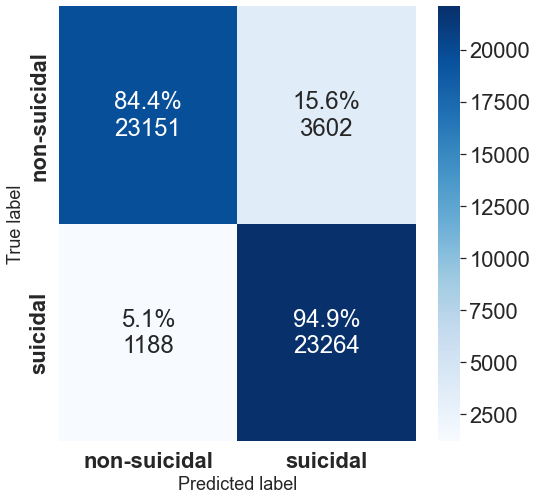

In [12]:

MNB = MultinomialNB(alpha=0.15,fit_prior=True, class_prior=None)
MNB_model = Model(MNB,"Multinomial Naive Bayes")

## SGD classifier

Cross Validation score =  [0.91679593 0.91670976 0.92205274 0.91839021 0.91855906 0.91989486
 0.91886069 0.91761107 0.91890378 0.92230792]
SGD classifier Trainng Score 0.922126048292838

SGD classifier Testing Score 0.9181514596574383



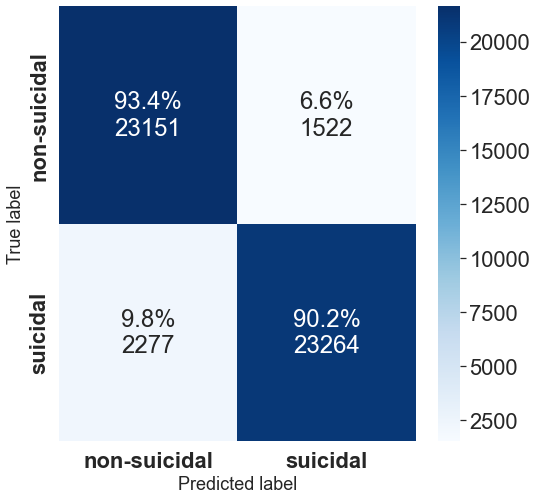

In [13]:

SGD = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-4, random_state=42, max_iter=200, tol=None)
SGD_model = Model(SGD,"SGD classifier")

## Logistic Regression

Cross Validation score =  [0.92640469 0.92493968 0.93092899 0.92670631 0.92722024 0.92726333
 0.9278235  0.92812513 0.92704787 0.93062438]
Logistic Regression classifier Trainng Score 0.9340026607920974

Logistic Regression classifier Testing Score 0.9261014758160078



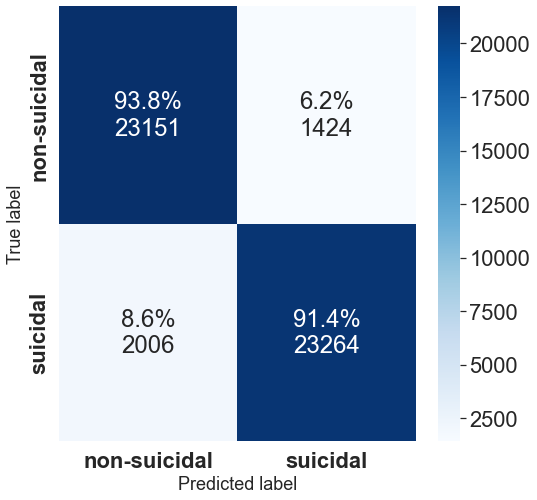

In [14]:

LR = LogisticRegression(penalty='l2',multi_class='ovr',solver='liblinear',C=0.8,random_state=42,tol=0.0001,max_iter=200)
LR_model = Model(LR,"Logistic Regression classifier")

## Random Forest Classifier

Cross Validation score =  [0.89800931 0.89831093 0.89981903 0.90007756 0.89705692 0.89972853
 0.90028871 0.90050416 0.90127979 0.90537338]
Randomforrenst classifier Trainng Score 0.9984326103232269

Randomforrenst classifier Testing Score 0.8994506086394485



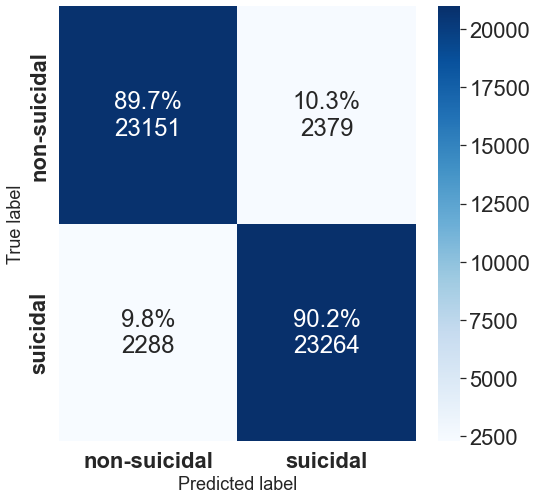

In [15]:

RF = RandomForestClassifier(n_estimators=200,criterion ='entropy')
RF_model = Model(RF,"Randomforrenst classifier")

## SVC

In [ ]:
SVC = SVC(random_state=42)
SVC_model = Model(SVC,"Support Vector classifier")

## XGB

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
XGB = xgb.XGBClassifier(n_jobs=1)
XGB_model = Model(XGB,"XGB classifier")

## Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAG = PassiveAggressiveClassifier(random_state=42,max_iter=500,tol=None)
PAG_model = Model(PAG,"Passive Aggressive Classifier")

# Performance comparison

In [ ]:
MLA = {
    'MNB' : MNB,
    'SGD' : SGD,
    'LR' : LR,
    'RF' : RF,
    'SVC' : SVC,
    'XGB' : XGB,
    'PAG' : PAG,
}

In [ ]:
columns = []
compare = pd.DataFrame(columns = columns)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes=4
row_index = 0
for name,alg in MLA.items():
    MLA_name = name
    predicted = alg.predict(X_test)
    auc_score = roc_auc_score(y_test, predicted)
    micro_averaged_recall = recall_score(y_test, predicted, average = 'micro')
    macro_averaged_f1 = f1_score(y_test, predicted, average = 'macro')
    precisions =precision_score(y_test, predicted, average = 'micro')
    
    compare.loc[row_index,'Name'] = MLA_name
    compare.loc[row_index, 'Test Accuracy'] = round(alg.score(X_test, y_test), 4)
    compare.loc[row_index, 'AUC'] = auc_score
    compare.loc[row_index, 'Precision'] = precisions
    compare.loc[row_index, 'Recall'] = micro_averaged_recall
    compare.loc[row_index, 'F1 Score'] = macro_averaged_f1
    row_index+=1
    
compare.sort_values(by = ['Test Accuracy'], ascending = False, inplace = True)    
compare

In [ ]:
#plot comaparison 
compare.plot(x="Name", y=["Test Accuracy", "Precision", "Recall", "F1 Score", "AUC"], kind="bar",figsize=(8, 5))
plt.xlabel('ML Algorithms',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.xticks(rotation = 45)
plt.legend(loc = 2, bbox_to_anchor = (1,1),prop={'size': 10})
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
n_folds=10
plt.plot(MNB_model,marker='o')
plt.plot(SGD_model,marker='o')
plt.plot(LR_model,marker='o')
plt.plot(RF_model,marker='o')
plt.plot(SVC_model,marker='o')
plt.plot(XGB_model,marker='o')
plt.plot(PAG_model,marker='o')
plt.title('CV score for each fold',fontsize=22)
plt.ylabel('Accuracy',fontsize=18)
plt.xlabel('Trained fold',fontsize=18)
plt.xticks([k for k in range(n_folds)])
plt.tick_params(axis='x',rotation=0,labelsize=25)
plt.tick_params(axis='y',rotation=0,labelsize=25)
plt.legend(['MNB', 'SGD', 'LR', 'RF', 'SVC', 'XGB', 'PAG'], loc=2,bbox_to_anchor = (1,1), prop={'size': 20})
plt.show()